<a href="https://colab.research.google.com/github/IsmaelArista/Global-Hitss/blob/main/Semillero_IA_ML_Modelos_de_Clasificacion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 🌳 Clasificación con Árboles de Decisión y Random Forest

## 🎯 Objetivo
Aprender a usar y comparar dos modelos de clasificación basados en árboles:
1. **Decision Tree Classifier** — un modelo único y fácilmente interpretable.
2. **Random Forest Classifier** — un conjunto de múltiples árboles (ensamble).

Analizaremos:
- Cómo se construyen los árboles.
- Cómo afectan los hiperparámetros.
- Qué diferencias hay entre ambos modelos en precisión y robustez.

---

## 🌳 Árbol de Decisión (Decision Tree)

Un **árbol de decisión** divide el espacio de los datos en regiones basadas en condiciones lógicas ("si... entonces...") para clasificar ejemplos.

Cada nodo representa una **pregunta sobre una variable**, y las hojas representan las **clases finales**.

Ventajas:
- Interpretación sencilla.
- No requiere escalamiento de variables.
- Funciona bien con variables mixtas (numéricas y categóricas).

Desventajas:
- Tiende al **sobreajuste (overfitting)**.
- Pequeños cambios en los datos pueden alterar mucho la estructura.

---

## 🌲 Random Forest

El **Random Forest** combina muchos árboles de decisión entrenados sobre diferentes subconjuntos de los datos y variables.
Cada árbol vota y la clase final es la más votada.

Ventajas:
- Reduce el sobreajuste de un solo árbol.
- Mejora la precisión y estabilidad.
- Aporta medidas de **importancia de variables**.

Desventajas:
- Más lento de entrenar.
- Menos interpretable que un árbol único.

---



In [1]:
#Librerias Necesarias para estos modelos
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, RocCurveDisplay


3️⃣ Cargar y explorar los datos

Usaremos el dataset de vino (load_wine) de sklearn — un clásico multiclase (3 clases de vino).

In [2]:
# Cargar dataset
data = load_wine()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = data.target

# División en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

print("Tamaño del dataset:", X.shape)
print("Clases:", np.unique(y, return_counts=True))
X.head()


Tamaño del dataset: (178, 13)
Clases: (array([0, 1, 2]), array([59, 71, 48]))


,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


4️⃣ Entrenamiento del Árbol de Decisión

=== Árbol de Decisión ===
              precision    recall  f1-score   support

           0       1.00      0.94      0.97        18
           1       0.91      1.00      0.95        21
           2       1.00      0.93      0.97        15

    accuracy                           0.96        54
   macro avg       0.97      0.96      0.96        54
weighted avg       0.97      0.96      0.96        54



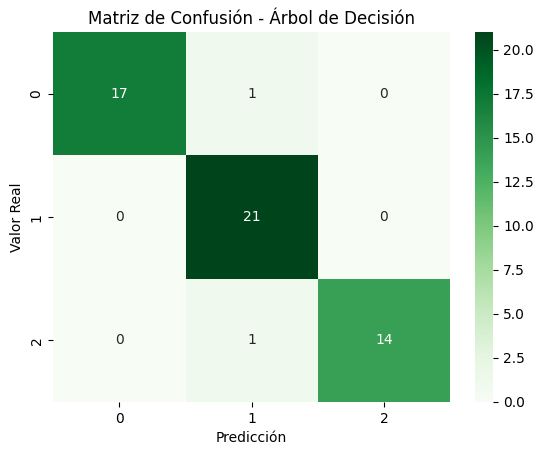

In [3]:
# Crear y entrenar el modelo
tree_model = DecisionTreeClassifier(random_state=42)
tree_model.fit(X_train, y_train)

# Predicciones
y_pred_tree = tree_model.predict(X_test)

# Métricas
print("=== Árbol de Decisión ===")
print(classification_report(y_test, y_pred_tree))

# Matriz de confusión
cm_tree = confusion_matrix(y_test, y_pred_tree)
sns.heatmap(cm_tree, annot=True, fmt='d', cmap='Greens')
plt.title("Matriz de Confusión - Árbol de Decisión")
plt.xlabel("Predicción")
plt.ylabel("Valor Real")
plt.show()


“El modelo de Árbol de Decisión muestra una excelente capacidad de clasificación, logrando más del 96% de precisión global.
La mayoría de las predicciones son correctas y los errores son mínimos, principalmente entre las clases 1 y 2, que suelen tener propiedades químicas parecidas.
Esto demuestra que los árboles pueden ser muy potentes incluso sin técnicas de ensamble como Random Forest.”

El modelo clasifica correctamente casi todos los ejemplos:

Total de aciertos = 17 + 21 + 14 = 52

Total de observaciones = 54

Accuracy global ≈ 96.3%

5️⃣ Entrenamiento del Random Forest

=== Random Forest ===
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        18
           1       1.00      1.00      1.00        21
           2       1.00      1.00      1.00        15

    accuracy                           1.00        54
   macro avg       1.00      1.00      1.00        54
weighted avg       1.00      1.00      1.00        54



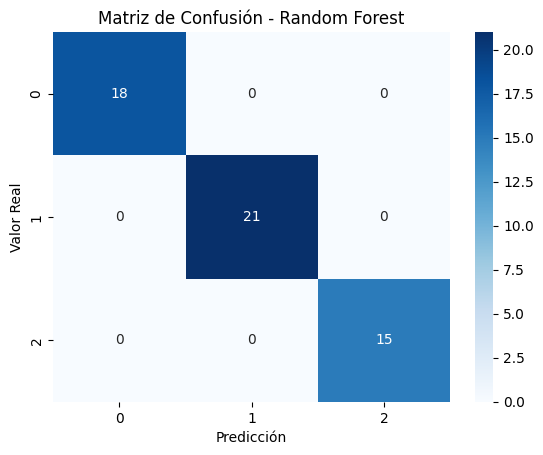

In [11]:
rf_model = RandomForestClassifier(n_estimators=500, max_depth=10, random_state=42)
rf_model.fit(X_train, y_train)

y_pred_rf = rf_model.predict(X_test)

print("=== Random Forest ===")
print(classification_report(y_test, y_pred_rf))

cm_rf = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues')
plt.title("Matriz de Confusión - Random Forest")
plt.xlabel("Predicción")
plt.ylabel("Valor Real")
plt.show()


“Podemos imaginar que el Árbol de Decisión es un solo juez, y el Random Forest es un jurado con 100 jueces.
Cada uno opina basándose en una parte diferente de la evidencia, y la decisión final se toma por votación.

De esta manera, el jurado (Random Forest) comete muchos menos errores que un juez solitario.”

Accuracy (exactitud)	(18 + 21 + 15) / (18 + 21 + 15) = 1.0 (100%)
Precision promedio	100%
Recall promedio	100%
F1-score promedio	100%

6️⃣ Comparación de curvas ROC (una clase contra las demás)

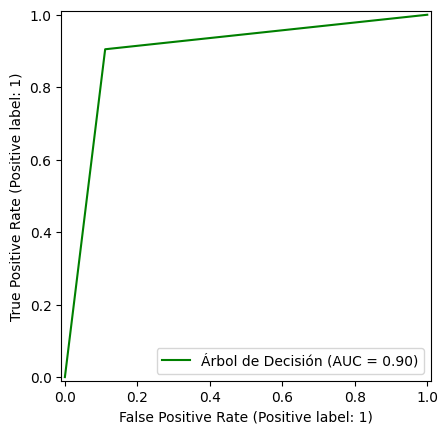

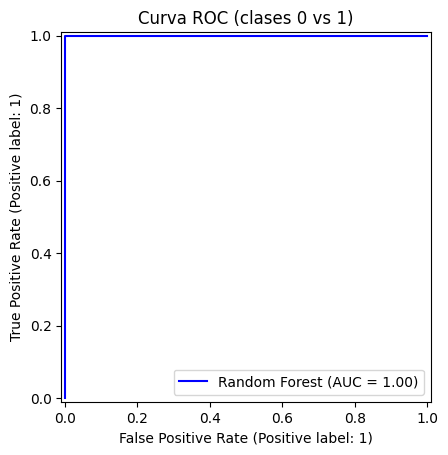

In [12]:
# Filtrar solo dos clases (0 y 1)
mask = y < 2
X_bin = X[mask]
y_bin = y[mask]

X_train_b, X_test_b, y_train_b, y_test_b = train_test_split(
    X_bin, y_bin, test_size=0.3, random_state=42, stratify=y_bin
)

# Reentrenar ambos modelos para el caso binario
tree_model_b = DecisionTreeClassifier(random_state=42)
tree_model_b.fit(X_train_b, y_train_b)

rf_model_b = RandomForestClassifier(n_estimators=500, random_state=42)
rf_model_b.fit(X_train_b, y_train_b)

# Dibujar curva ROC binaria
RocCurveDisplay.from_estimator(tree_model_b, X_test_b, y_test_b, name="Árbol de Decisión", color="green")
RocCurveDisplay.from_estimator(rf_model_b, X_test_b, y_test_b, name="Random Forest", color="blue")

plt.title("Curva ROC (clases 0 vs 1)")
plt.show()



📊 7️⃣ Importancia de características (Random Forest)

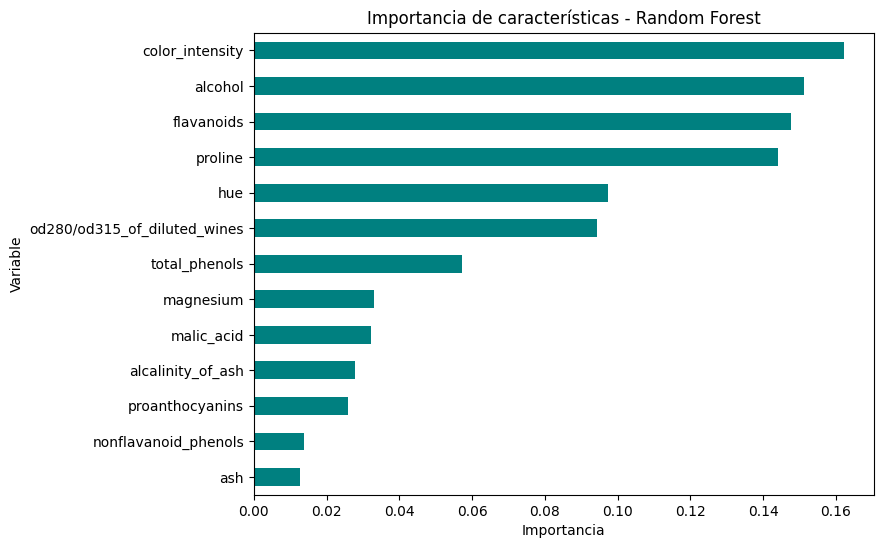

In [13]:
importances = pd.Series(rf_model.feature_importances_, index=X.columns).sort_values(ascending=True)

plt.figure(figsize=(8,6))
importances.plot(kind='barh', color='teal')
plt.title("Importancia de características - Random Forest")
plt.xlabel("Importancia")
plt.ylabel("Variable")
plt.show()


#Da tus Conclusiones y explicalas
En este gráfico, cada barra representa qué tan útil fue cada característica para que nuestro modelo pudiera diferenciar correctamente las clases del dataset wine.
La importancia nos dice qué tanto ayuda una variable a reducir los errores de clasificación dentro del modelo.

Las más relevantes son alcohol, color_intensity y flavanoids. Esto significa que esos valores numéricos cambian bastante entre las clases del dataset, por lo que el modelo los usa con frecuencia para tomar sus decisiones. Son variables que permiten separar rápidamente los grupos.

Después aparecen proline, hue y diluted_wines, que también ayudan a distinguir las observaciones, aunque en menor medida.
El resto, como total_phenols, magnesium o malic_acid, sí aportan información, pero son menos determinantes o tienden a coincidir con los patrones de las variables más importantes.

#Algo de Teoria para Explicar
# 🌳 Teoría: Medidas de Pureza en Árboles de Decisión

Los **árboles de decisión** clasifican los datos dividiendo el espacio de atributos en regiones cada vez más homogéneas.  
Cada división se realiza en base a una **métrica de impureza**, que mide qué tan mezcladas están las clases en un nodo.

Un nodo es un punto de decisión dentro del árbol donde se evalúa una condición sobre una variable (atributo) para dividir los datos.
---

## 🎯 Objetivo de un Árbol de Decisión
El propósito del algoritmo es **dividir los datos en subconjuntos lo más puros posible**.  
En un nodo puro, todas las observaciones pertenecen a una sola clase.

Por ejemplo:

| Nodo | Clase A | Clase B | Pureza |
|-------|----------|----------|----------|
| N1 | 50 | 0 | Muy puro ✅ |
| N2 | 25 | 25 | Mezclado ❌ |

---

## ⚖️ 1️⃣ Índice de Gini

El **índice Gini** es la métrica más usada en clasificación (por defecto en `DecisionTreeClassifier` de Scikit-Learn).

\[
Gini = 1 - \sum_{i=1}^{C} p_i^2
\]

donde:
- \( C \): número de clases.
- \( p_i \): proporción de muestras de la clase *i* en el nodo.

| Situación | Ejemplo | Resultado |
|------------|----------|------------|
| Nodo puro | (100% de una clase) | Gini = 0 |
| Nodo con 50% y 50% | (mezcla de dos clases) | Gini = 0.5 |
| Nodo con 3 clases equilibradas | (⅓ cada una) | Gini ≈ 0.67 |

**Interpretación:**  
Mientras más bajo es el Gini, **más puro es el nodo**.

---

## 🧮 2️⃣ Entropía (criterio alternativo)

Otra métrica posible es la **entropía de Shannon**, usada en teoría de la información:

\[
Entropy = - \sum_{i=1}^{C} p_i \log_2(p_i)
\]

- Si todas las muestras pertenecen a una sola clase → **Entropía = 0**
- Si las clases están mezcladas → **Entropía aumenta**

Ambos criterios (Gini y Entropía) buscan lo mismo: **reducir la impureza** tras cada división.

| Diferencia práctica | Entropía | Gini |
|----------------------|-----------|------|
| Más teórico (basado en información) | ✅ | |
| Más rápido de calcular | | ✅ |
| Resultado muy similar | ✅ | ✅ |

---

## 🔀 3️⃣ Ganancia de Información

Cada vez que el árbol hace una división, mide **cuánto se redujo la impureza** entre el nodo padre y sus hijos.

\[
\text{Ganancia} = \text{Impureza}_{padre} - \sum_{hijos} \frac{N_h}{N_{padre}} \times \text{Impureza}_{hijo}
\]

👉 El árbol elige **la división que produce la mayor ganancia** de pureza (mayor reducción de Gini o entropía).

---

## 🌱 4️⃣ Pureza, Profundidad y Sobreajuste

- Un **nodo hoja** es un punto final del árbol (no se puede dividir más).  
- Si cada hoja contiene solo ejemplos de una clase, el árbol tiene **Gini = 0** y se dice que está **perfectamente ajustado al entrenamiento**.  
- Sin embargo, esto puede causar **sobreajuste (overfitting)**: el modelo aprende los datos exactos y no generaliza bien a nuevos casos.

### 🔹 Parámetros importantes:
| Parámetro | Significado | Efecto |
|------------|--------------|--------|
| `max_depth` | Profundidad máxima del árbol | Controla la complejidad |
| `min_samples_split` | Mínimo de muestras para dividir un nodo | Evita divisiones innecesarias |
| `min_samples_leaf` | Mínimo de muestras por hoja | Suaviza el modelo |
| `criterion` | Métrica de impureza (`gini` o `entropy`) | Define la medida de pureza |

---

## 📊 5️⃣ Interpretación en la Visualización del Árbol

Cada cuadro (nodo) del árbol muestra:

| Campo | Qué representa |
|--------|----------------|
| **gini** | Impureza del nodo (0 = puro) |
| **samples** | Número de ejemplos que llegan al nodo |
| **value = [a,b,c]** | Distribución de clases en ese nodo |
| **class = ...** | Clase dominante predicha |

Los nodos con colores más intensos son los **más puros**,  
y los más pálidos indican **mezcla de clases**.

---

## 🧠 Conclusión

> El Árbol de Decisión divide el espacio de datos buscando **nodos con baja impureza (Gini o Entropía)**.  
> Esto le permite clasificar los ejemplos de forma intuitiva y visual.  
> Sin embargo, un árbol muy profundo puede memorizar los datos (sobreajuste),  
> por lo que normalmente se controla su complejidad con parámetros como `max_depth` o usando métodos de ensamble como **Random Forest**.

---


🌿 8️⃣ Visualización del Árbol de Decisión

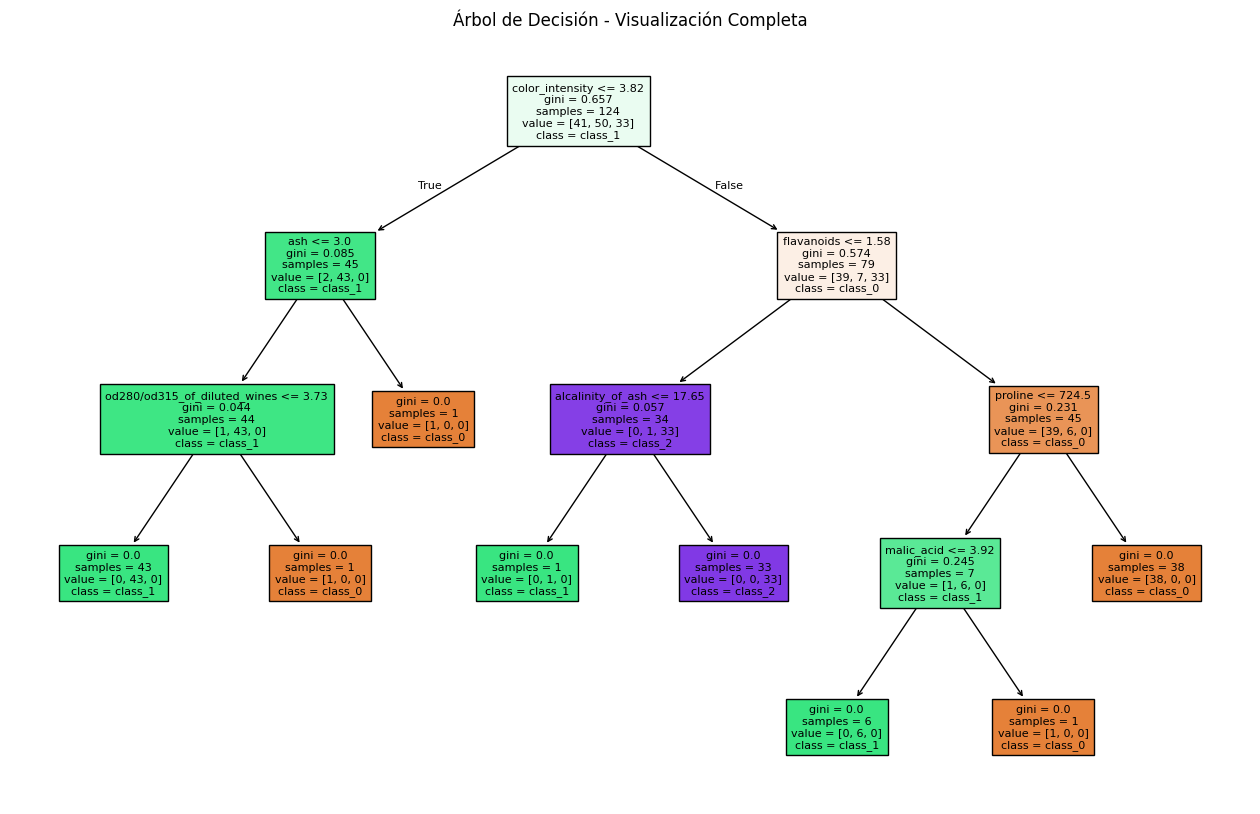

In [14]:
plt.figure(figsize=(16, 10))
plot_tree(tree_model, filled=True, feature_names=X.columns, class_names=data.target_names, fontsize=8)
plt.title("Árbol de Decisión - Visualización Completa")
plt.show()


#Da tu conclusiones de este ejercicio tomando en cuanto lo explicado y los resultados de las graficas

El árbol que muestras representa cómo el modelo fue dividiendo los datos hasta llegar a nodos donde casi todas las observaciones pertenecen a una sola clase.
Cada rectángulo es una decisión basada en una variable y un valor límite. Si la condición se cumple, el dato avanza por la rama izquierda o por la rama derecha.

En la parte superior está la variable color_intensity, que fue la primera elegida para dividir los datos porque ofrecía la mayor ganancia de pureza. Esto significa que, al separar los casos con valores bajos y altos de esa variable, el árbol logró distinguir bastante bien entre las clases principales.

El color de los nodos refleja ese nivel de pureza: tonos más intensos indican nodos más homogéneos. En este árbol, la mayoría de las hojas finales son puras, lo que indica que el modelo logró separar bien las clases durante el entrenamiento.

# 📋 Conclusiones

- El **árbol de decisión** es más simple, rápido e interpretativo, pero tiende al **sobreajuste**, sobre todo sin limitar su profundidad.
- El **Random Forest** reduce ese sobreajuste combinando múltiples árboles, por lo que suele obtener **mejor rendimiento y generalización**.
- En este dataset, probablemente el Random Forest logre **mayor precisión y F1-score**.
- Las **importancias de variables** permiten identificar qué atributos (como el contenido de alcohol o fenoles) son más influyentes en la clasificación.

---

## 💡 Ejercicios propuestos:
1. Cambia el parámetro `max_depth` del árbol a 3, 5, 10 y observa cómo varían las métricas.
2. Modifica el número de árboles del Random Forest (`n_estimators`) a 10, 100 y 500.
3. Observa cómo cambia el rendimiento si agregas `max_features='sqrt'` o `criterion='entropy'`.
